In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv


In [72]:
df=pd.read_csv("/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv")
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [73]:
label_counts = df['is_depression'].value_counts()
print(label_counts)


is_depression
0    3900
1    3831
Name: count, dtype: int64


In [74]:
df[['clean_text', 'is_depression']].head()


,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


Label distribution:
 is_depression
0    3900
1    3831
Name: count, dtype: int64

Percentage distribution:
 is_depression
0    50.446255
1    49.553745
Name: count, dtype: float64


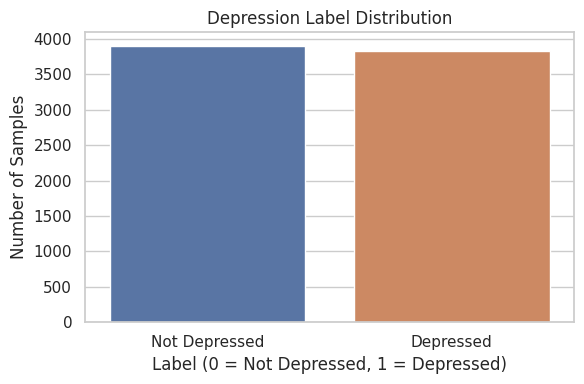

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['is_depression'].value_counts()
print("Label distribution:\n", label_counts)
print("\nPercentage distribution:\n", label_counts / len(df) * 100)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_depression')
plt.title("Depression Label Distribution")
plt.xlabel("Label (0 = Not Depressed, 1 = Depressed)")
plt.ylabel("Number of Samples")
plt.xticks([0, 1], ['Not Depressed', 'Depressed'])
plt.tight_layout()
plt.show()


In [76]:
df.duplicated().sum()

81

In [77]:
df.isna().sum()

clean_text       0
is_depression    0
dtype: int64

In [78]:
df= df.drop_duplicates()

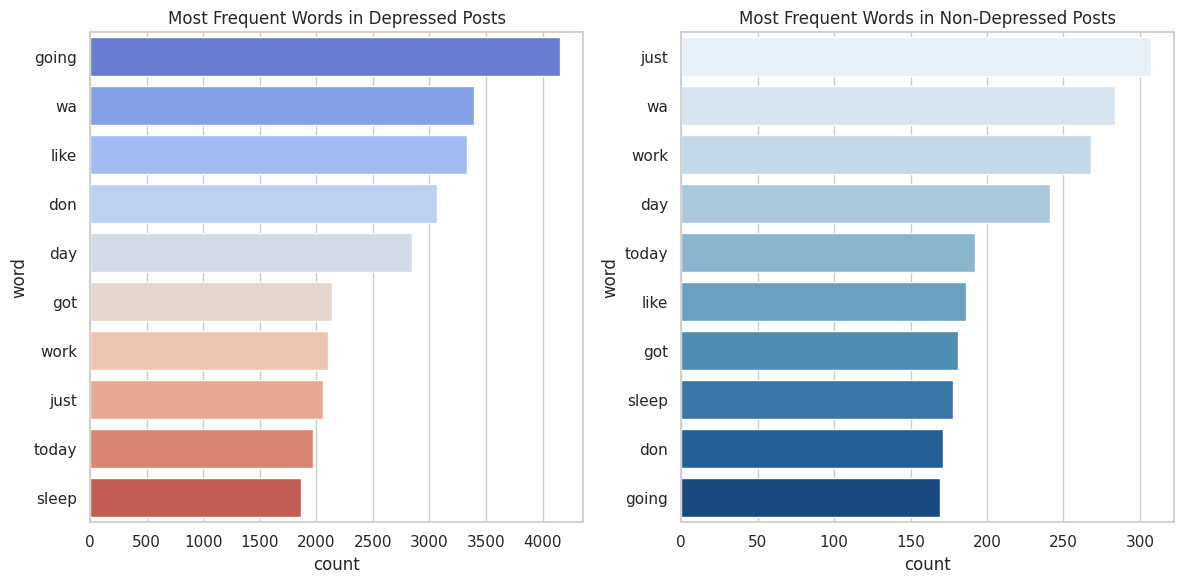

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
vectorizer = CountVectorizer(stop_words='english', max_features=10)
depressed_posts = df[df['is_depression'] == 1]['clean_text']
non_depressed_posts = df[df['is_depression'] == 0]['clean_text']

depressed_matrix = vectorizer.fit_transform(depressed_posts)
non_depressed_matrix = vectorizer.fit_transform(non_depressed_posts)

words = vectorizer.get_feature_names_out()

depressed_word_counts = depressed_matrix.sum(axis=0).A1
non_depressed_word_counts = non_depressed_matrix.sum(axis=0).A1

depressed_df = pd.DataFrame({'word': words, 'count': depressed_word_counts})
non_depressed_df = pd.DataFrame({'word': words, 'count': non_depressed_word_counts})

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='count', y='word', data=depressed_df.sort_values(by='count', ascending=False), palette='coolwarm')
plt.title("Most Frequent Words in Depressed Posts")

plt.subplot(1, 2, 2)
sns.barplot(x='count', y='word', data=non_depressed_df.sort_values(by='count', ascending=False), palette='Blues')
plt.title("Most Frequent Words in Non-Depressed Posts")

plt.tight_layout()
plt.show()


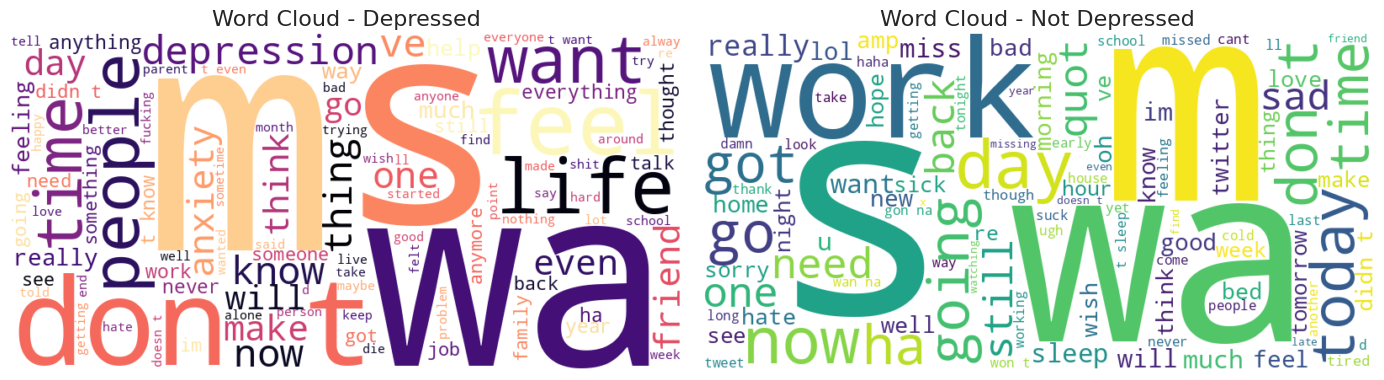

In [80]:
from wordcloud import WordCloud

depressed_text = ' '.join(df[df['is_depression'] == 1]['clean_text'])
not_depressed_text = ' '.join(df[df['is_depression'] == 0]['clean_text'])

wordcloud_depressed = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='magma',
    max_words=100
).generate(depressed_text)

wordcloud_not_depressed = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(not_depressed_text)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_depressed, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Depressed", fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_not_depressed, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Not Depressed", fontsize=16)

plt.tight_layout()
plt.show()


In [81]:
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['clean_text'].apply(lambda x: sum(len(w) for w in x.split()) / len(x.split()))


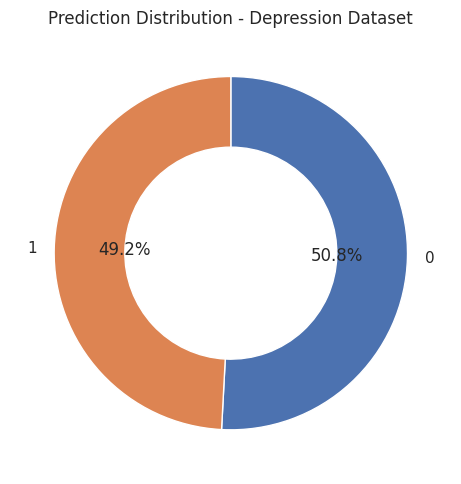

In [82]:
pred_counts = df['is_depression'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
plt.title('Prediction Distribution - Depression Dataset')
plt.tight_layout()
plt.show()


In [83]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['clean_text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
df['clean_text'].head()

0    understand people reply immediately op invitat...
1    welcome r depression check post place take mom...
2    anyone else instead sleeping depressed stay ni...
3    kind stuffed around lot life delaying inevitab...
4    sleep greatest comforting escape whenever wake...
Name: clean_text, dtype: object

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
import pandas as pd

X = df['clean_text']
y = df['is_depression']

vectorizer = TfidfVectorizer(max_features=3000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.25, random_state=42)

results = []

svc = SVC(probability=True, random_state=42, C=0.2)
svc.fit(X_train, y_train)
svc_score = svc.predict_proba(X_test)[:, 1]
svc_pred_adjusted = (svc_score > 0.4).astype(int)
results.append({
    'Model': 'SVC',
    'Accuracy': accuracy_score(y_test, svc_pred_adjusted),
    'Precision': precision_score(y_test, svc_pred_adjusted),
    'Recall': recall_score(y_test, svc_pred_adjusted),
    'F1-Score': f1_score(y_test, svc_pred_adjusted),
    'AUC': auc(*roc_curve(label_binarize(y_test, classes=[0, 1]), svc_score)[:2])
})

nb = GaussianNB()
nb.fit(X_train.toarray(), y_train)
nb_score = nb.predict_proba(X_test.toarray())[:, 1]
nb_pred_adjusted = (nb_score > 0.4).astype(int)
results.append({
    'Model': 'Naive Bayes',
    'Accuracy': accuracy_score(y_test, nb_pred_adjusted),
    'Precision': precision_score(y_test, nb_pred_adjusted),
    'Recall': recall_score(y_test, nb_pred_adjusted),
    'F1-Score': f1_score(y_test, nb_pred_adjusted),
    'AUC': auc(*roc_curve(label_binarize(y_test, classes=[0, 1]), nb_score)[:2])
})

logreg = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)
logreg_score = logreg.predict_proba(X_test)[:, 1]
logreg_pred_adjusted = (logreg_score > 0.4).astype(int)
results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, logreg_pred_adjusted),
    'Precision': precision_score(y_test, logreg_pred_adjusted),
    'Recall': recall_score(y_test, logreg_pred_adjusted),
    'F1-Score': f1_score(y_test, logreg_pred_adjusted),
    'AUC': auc(*roc_curve(label_binarize(y_test, classes=[0, 1]), logreg_score)[:2])
})

rf = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=10, random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.predict_proba(X_test)[:, 1]
rf_pred_adjusted = (rf_score > 0.4).astype(int)
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, rf_pred_adjusted),
    'Precision': precision_score(y_test, rf_pred_adjusted),
    'Recall': recall_score(y_test, rf_pred_adjusted),
    'F1-Score': f1_score(y_test, rf_pred_adjusted),
    'AUC': auc(*roc_curve(label_binarize(y_test, classes=[0, 1]), rf_score)[:2])
})

xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.05, subsample=0.7, colsample_bytree=0.7, use_label_encoder=False, eval_metric='logloss', reg_lambda=2.0, random_state=42)
xgb.fit(X_train, y_train)
xgb_score = xgb.predict_proba(X_test)[:, 1]
xgb_pred_adjusted = (xgb_score > 0.4).astype(int)
results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, xgb_pred_adjusted),
    'Precision': precision_score(y_test, xgb_pred_adjusted),
    'Recall': recall_score(y_test, xgb_pred_adjusted),
    'F1-Score': f1_score(y_test, xgb_pred_adjusted),
    'AUC': auc(*roc_curve(label_binarize(y_test, classes=[0, 1]), xgb_score)[:2])
})

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0                  SVC  0.950340   0.945833  0.954784  0.950288  0.987047
1          Naive Bayes  0.895975   0.873016  0.925342  0.898418  0.896143
2  Logistic Regression  0.928385   0.896686  0.967403  0.930703  0.983649
3        Random Forest  0.879247   0.869610  0.890641  0.880000  0.953707
4              XGBoost  0.946681   0.982935  0.908517  0.944262  0.978173


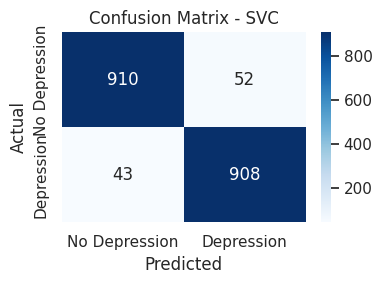

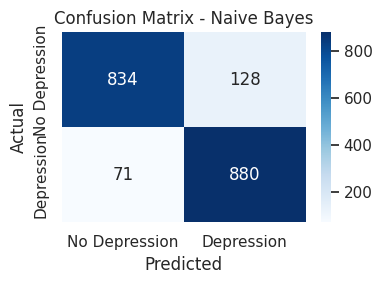

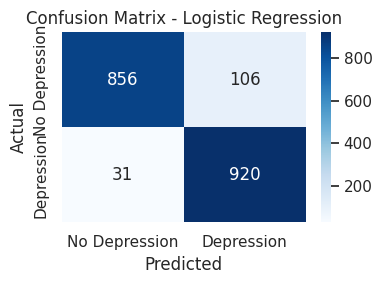

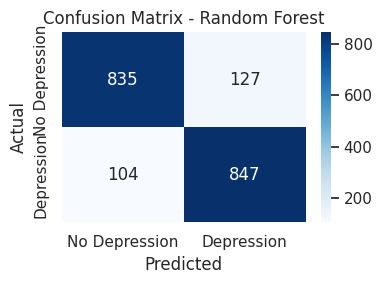

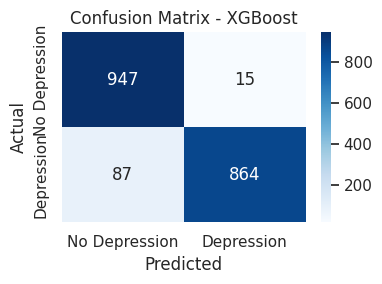

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models_preds = {
    'SVC': svc_pred_adjusted,
    'Naive Bayes': nb_pred_adjusted,
    'Logistic Regression': logreg_pred_adjusted,
    'Random Forest': rf_pred_adjusted,
    'XGBoost': xgb_pred_adjusted
}

for model_name, y_pred in models_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Depression', 'Depression'],
                yticklabels=['No Depression', 'Depression'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()


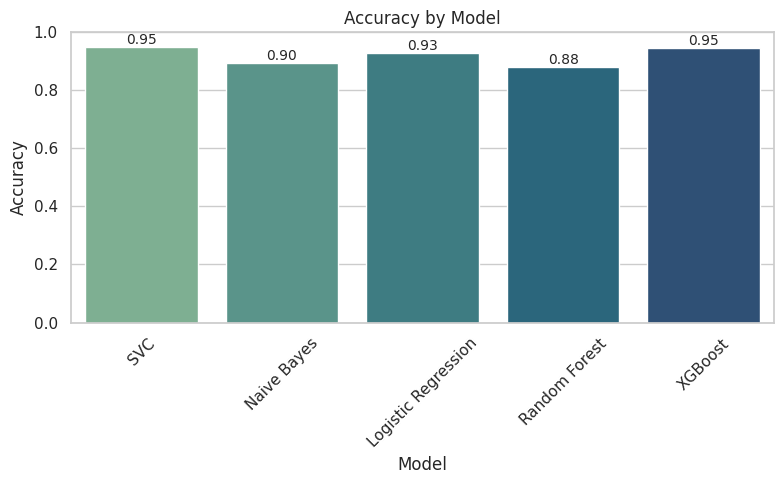

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='crest')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Accuracy by Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


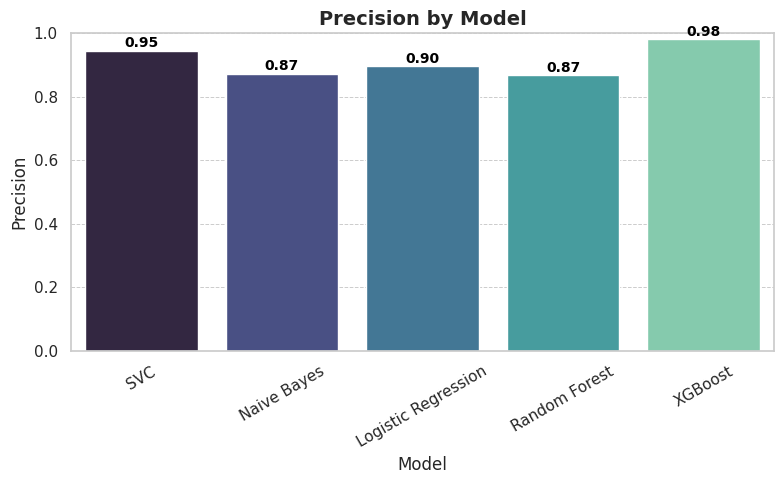

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Model', y='Precision', data=results_df, palette='mako')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.01,
            f'{p.get_height():.2f}', ha='center', fontsize=10, fontweight='bold', color='black')
plt.title('Precision by Model', fontsize=14, weight='bold')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


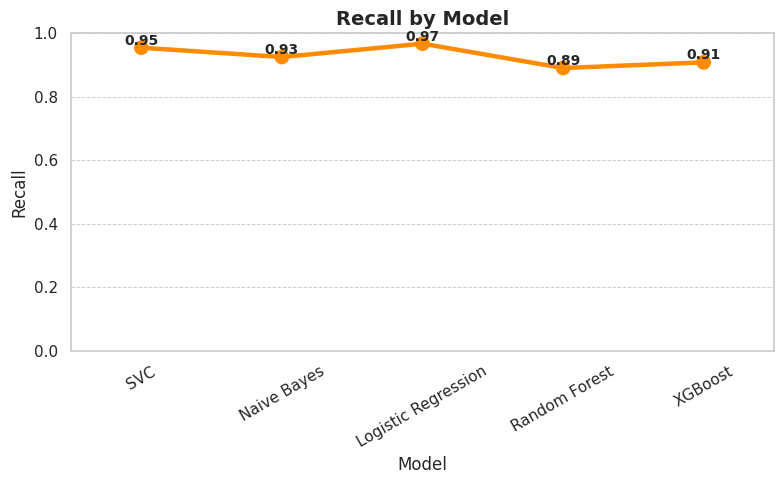

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.pointplot(x='Model', y='Recall', data=results_df, color='darkorange', markers='o', linestyles='-', scale=1.2)
for i, row in results_df.iterrows():
    ax.text(i, row['Recall'] + 0.01, f'{row["Recall"]:.2f}', ha='center', fontsize=10, fontweight='bold')
plt.title('Recall by Model', fontsize=14, weight='bold')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


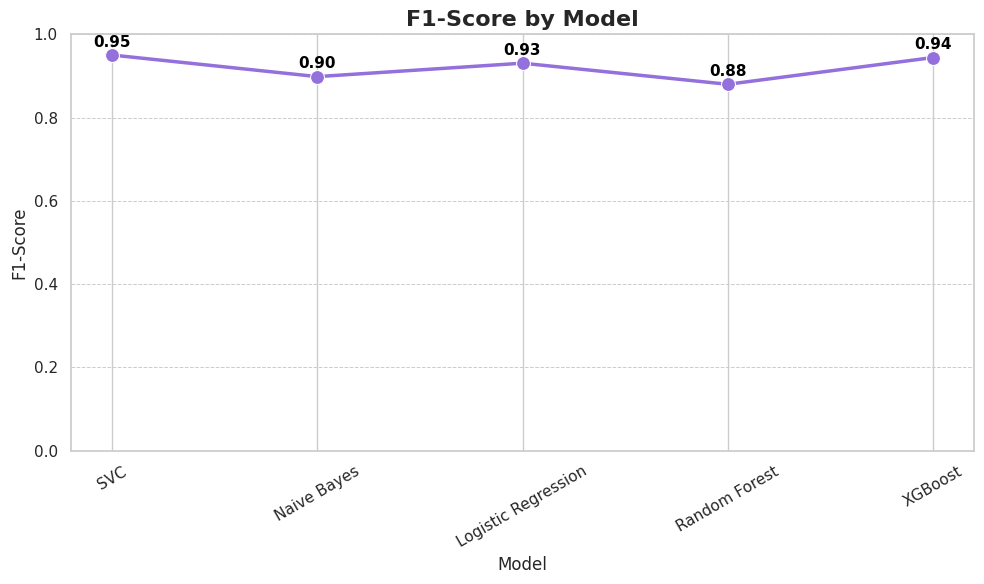

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Model', y='F1-Score', data=results_df, marker='o', markersize=10, linewidth=2.5, color='mediumpurple')
for i, row in results_df.iterrows():
    ax.annotate(f'{row["F1-Score"]:.2f}', 
                (i, row['F1-Score'] + 0.02), 
                ha='center', fontsize=11, fontweight='bold', color='black')
plt.title('F1-Score by Model', fontsize=16, weight='bold')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


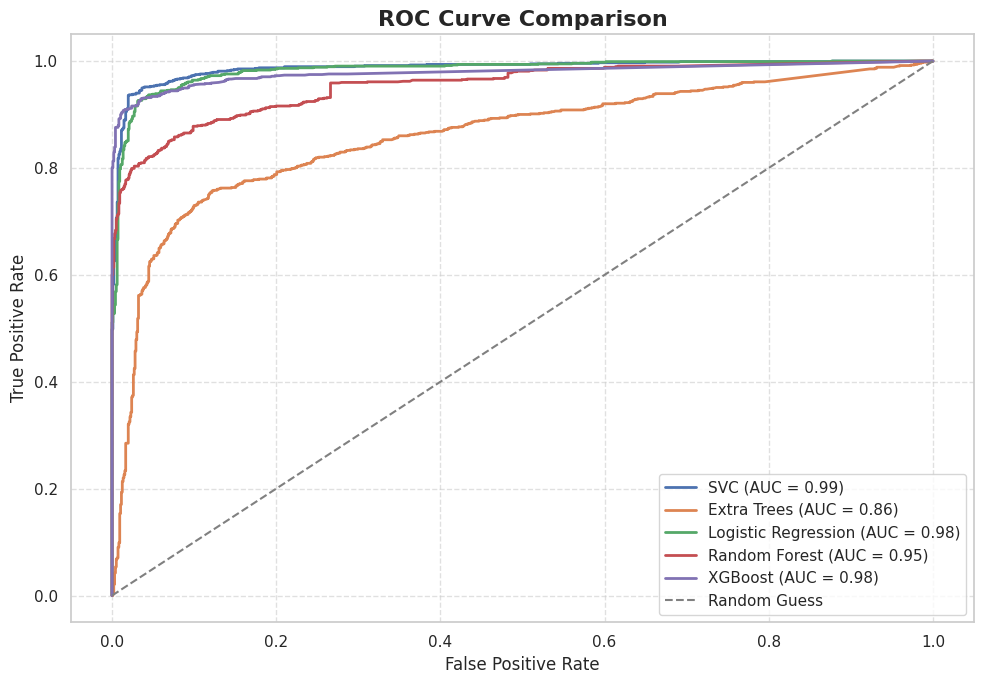

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

plt.figure(figsize=(10, 7))

# Binarize y_test
y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()

models_scores = [
    ('SVC', svc_score),
    ('Extra Trees', extree_score),
    ('Logistic Regression', logreg_score),
    ('Random Forest', rf_score),
    ('XGBoost', xgb_score)
]

for name, scores in models_scores:
    fpr, tpr, _ = roc_curve(y_test_bin, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison', fontsize=16, weight='bold')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Depression Classification Using Simple Neural Network

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6991 - loss: 0.6663 - val_accuracy: 0.8092 - val_loss: 0.5396
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8107 - loss: 0.5304 - val_accuracy: 0.8712 - val_loss: 0.3719
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8616 - loss: 0.3911 - val_accuracy: 0.9026 - val_loss: 0.2903
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8892 - loss: 0.3153 - val_accuracy: 0.9137 - val_loss: 0.2466
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9025 - loss: 0.2807 - val_accuracy: 0.9242 - val_loss: 0.2140
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9091 - loss: 0.2525 - val_accuracy: 0.9359 - val_loss: 0.1864
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9300 - loss: 0.2142 - val_accuracy: 0.9458 - val_loss: 0.1608
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9452 - loss: 0.1783 - val_accuracy: 0.

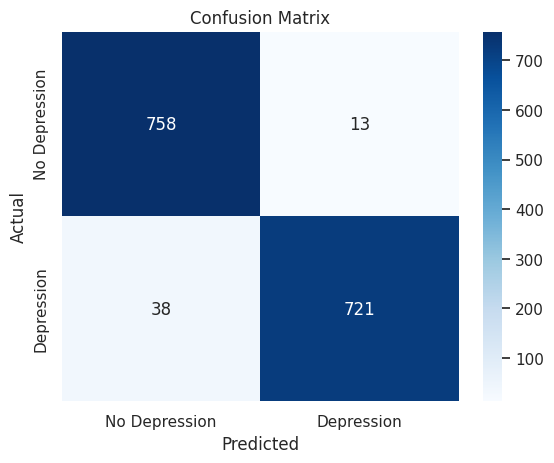

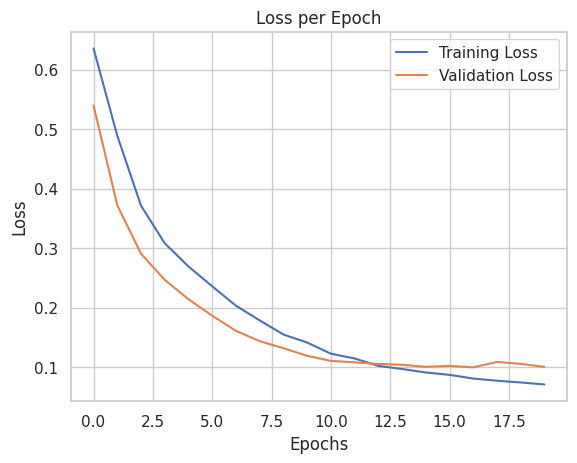

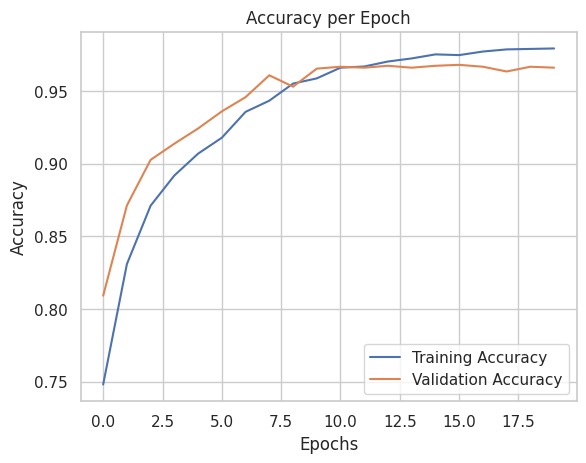

In [93]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download("stopwords")

data = pd.read_csv("/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv")
data = data.drop_duplicates(subset=["clean_text"])

def clean(text):
    stemmer = nltk.SnowballStemmer("english")
    stopword = set(stopwords.words('english'))
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["clean_text"] = data["clean_text"].apply(clean)
x = data["clean_text"]
y = data["is_depression"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

max_vocab_length = 10000
max_length = 40

text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode="int", output_sequence_length=max_length)
text_vectorizer.adapt(X_train)

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = layers.Embedding(input_dim=max_vocab_length, output_dim=128)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = models.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Y_pred = model.predict(X_test)
Y_pred = (Y_pred >= 0.5).astype("int")

print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.show()

plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()


# LSTM-based binary text classification model 

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6835 - loss: 0.6452 - val_accuracy: 0.8569 - val_loss: 0.3586
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8957 - loss: 0.3081 - val_accuracy: 0.9320 - val_loss: 0.2035
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9488 - loss: 0.1667 - val_accuracy: 0.9667 - val_loss: 0.1285
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9783 - loss: 0.0927 - val_accuracy: 0.9673 - val_loss: 0.1273
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9793 - loss: 0.0886 - val_accuracy: 0.9477 - val_loss: 0.1624
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9810 - loss: 0.0791 - val_accuracy: 0.9621 - val_loss: 0.1306
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9865 - loss: 0.0593 - val_accuracy: 0.9484 - val_loss: 0.1803
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

          

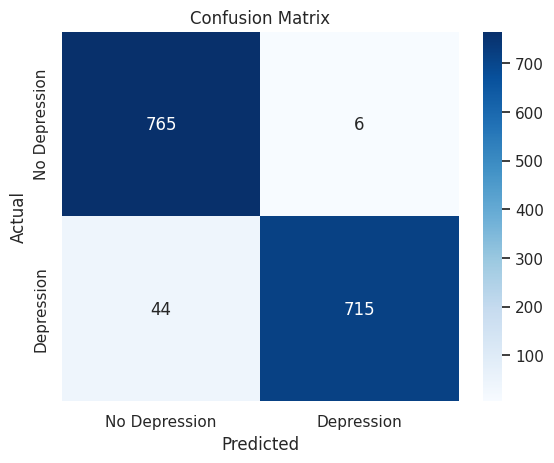

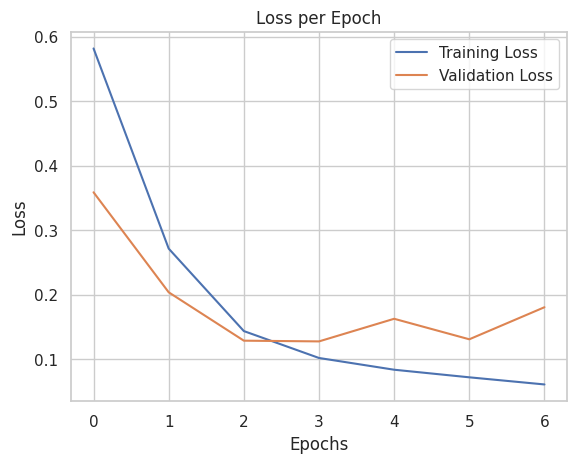

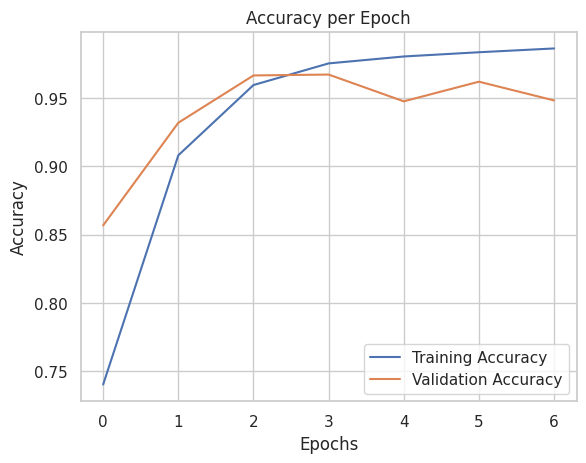

In [97]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

nltk.download("stopwords")

# Load and preprocess data
data = pd.read_csv("/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv")
data = data.drop_duplicates(subset=["clean_text"])

def clean(text):
    stemmer = nltk.SnowballStemmer("english")
    stopword = set(stopwords.words('english'))
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["clean_text"] = data["clean_text"].apply(clean)
x = data["clean_text"]
y = data["is_depression"]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Text vectorization
max_vocab_length = 10000
max_length = 40

text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode="int", output_sequence_length=max_length)
text_vectorizer.adapt(X_train)

# Simple LSTM Model
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = layers.Embedding(input_dim=max_vocab_length, output_dim=128)(x)
x = layers.LSTM(64)(x)  # A single LSTM layer with fewer units
outputs = layers.Dense(1, activation="sigmoid")(x)

model = models.Model(inputs, outputs)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

# EarlyStopping to prevent overfitting
early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluation
Y_pred = model.predict(X_test)
Y_pred = (Y_pred >= 0.5).astype("int")

print(classification_report(Y_test, Y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Loss and Accuracy plots
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.show()

plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()


# Simple CNN Model for Text Classification:

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6850 - loss: 0.6390 - val_accuracy: 0.8366 - val_loss: 0.4930
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8453 - loss: 0.4526 - val_accuracy: 0.9092 - val_loss: 0.2749
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9069 - loss: 0.2723 - val_accuracy: 0.9366 - val_loss: 0.1938
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9287 - loss: 0.2082 - val_accuracy: 0.9490 - val_loss: 0.1510
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9462 - loss: 0.1629 - val_accuracy: 0.9621 - val_loss: 0.1312
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9616 - loss: 0.1212 - val_accuracy: 0.9627 - val_loss: 0.1210
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9701 - loss: 0.1111 - val_accuracy: 0.9641 - val_loss: 0.1180
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9737 - loss: 0.0987 - val_accuracy: 0.

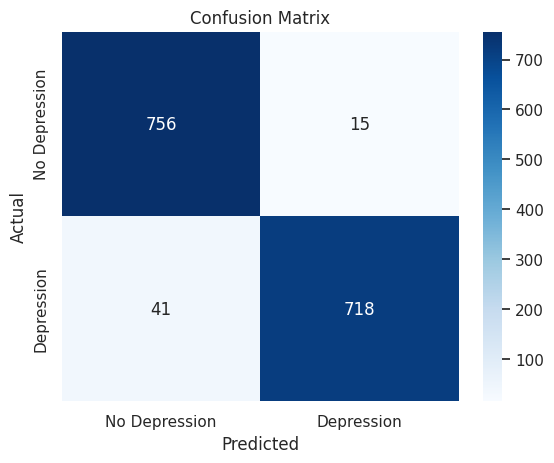

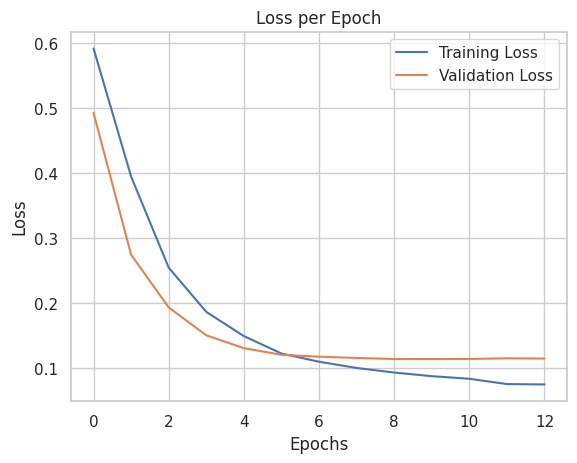

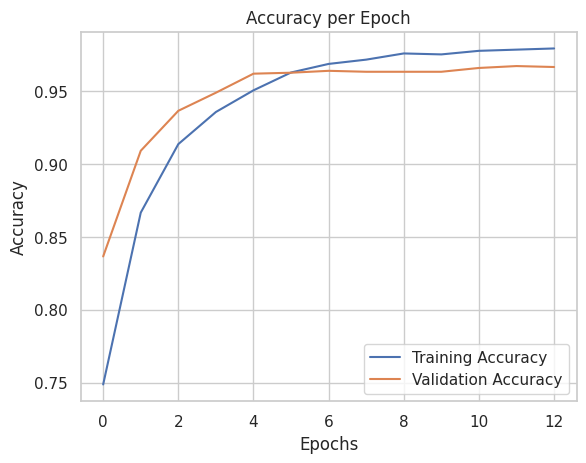

In [98]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

nltk.download("stopwords")

data = pd.read_csv("/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv")
data = data.drop_duplicates(subset=["clean_text"])

def clean(text):
    stemmer = nltk.SnowballStemmer("english")
    stopword = set(stopwords.words('english'))
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["clean_text"] = data["clean_text"].apply(clean)
x = data["clean_text"]
y = data["is_depression"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

max_vocab_length = 10000
max_length = 40

text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode="int", output_sequence_length=max_length)
text_vectorizer.adapt(X_train)

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = layers.Embedding(input_dim=max_vocab_length, output_dim=128)(x)
x = layers.Conv1D(64, 5, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=4)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = models.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Y_pred = model.predict(X_test)
Y_pred = (Y_pred >= 0.5).astype("int")

print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.show()

plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()
